In [1]:
# Perform the standard numpy and units imports
import numpy as np
import matplotlib.pyplot as plt
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity
import matplotlib.pyplot as plt
%matplotlib inline
# This notebook is also used for development/testing of the Optics module, so auto reload the Optics module if it changes
import morticia.sensor.optics as optics
%load_ext autoreload
%aimport morticia.sensor.optics
%autoreload 1



In [7]:
SpatialFrequencies = Q_(np.arange(0.0, 4.0, 0.01), '1/milliradian')  # Spatial frequencies up to 4 cycles per mrad
Luminance = Q_([10, 100, 1000, 10000], 'candela/m**2')  # Luminance levels
DisplaySize = Q_(10, 'degrees')  # Square display of width 10 degrees at eye
theCTF = optics.ctf_eye(SpatialFrequencies, Luminance, DisplaySize, 2)  # Compute CTF for 2 eyes at all
                                                                 # spatial frequencies and luminance levels.

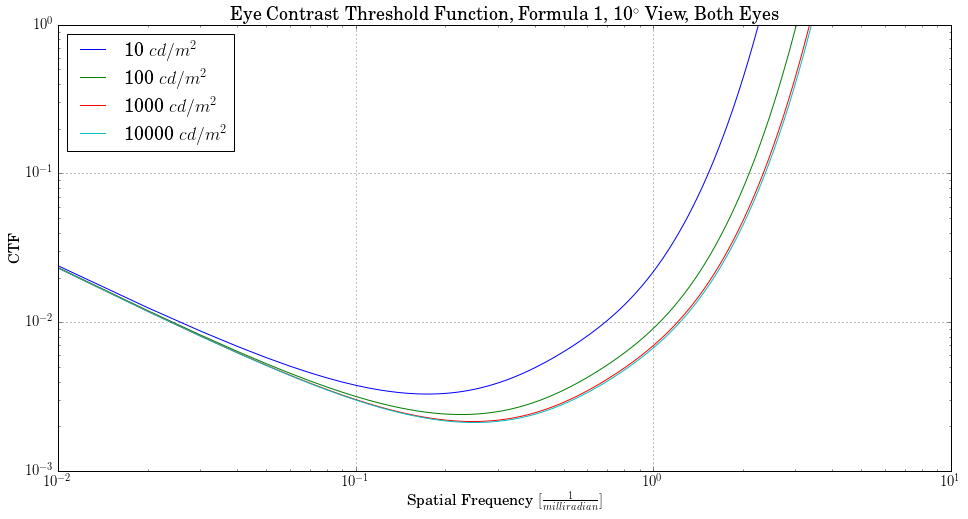

In [16]:
plt.figure(figsize=(16,8))
plt.rc('text', usetex=True)  # Use TeX to render the labels in the plot
plt.rc('font', family='serif', size=15)  # Default to a serif font 
ax = plt.loglog(SpatialFrequencies, theCTF.T)
plt.xlabel('Spatial Frequency $[{:L}]$'.format(SpatialFrequencies.units))
plt.ylabel('CTF')
plt.title('Eye Contrast Threshold Function, Formula 1, 10$^\circ$ View, Both Eyes')
plt.legend(ax, ['10 $cd/m^2$', '100 $cd/m^2$', '1000 $cd/m^2$','10000 $cd/m^2$'], loc='upper left')
plt.grid()

In [43]:
# The maximum acuity of the average human eye is 3.5 cycles/mrad, requring 100% contrast
# The Johnson criteria state that 6.4 cycles are required aver the critical dimension of the
# target in order to reach a threshold of 50% probability that the object will be recognised.

# The length of the object is 28 m, but we argue that the height is really the critical dimension in order to
# discern the overall shape and presence of the tail.
acuity_freq = 3.0  # cycles/mrad
threshold = 6.4  # cycles (Johnson identification)
angular_subtense = threshold /acuity_freq / 1000.0  # radians
target_height = 9.0  # m
target_length = 28.0  # m
critical_dimension = np.sqrt(target_height * target_length)  # m
threshold_distance = critical_dimension /  angular_subtense
rayleigh_ext_coeff = 0.01159  # per km
aerosol_ext_coeff = 0.075  # per km
total_ext_coeff = rayleigh_ext_coeff + aerosol_ext_coeff
zero_range_contrast = 0.5
sky_to_ground_ratio = 1.0


In [44]:
print 'Angular Subtense ', angular_subtense, ' radians'
print 'Critical Dimension ', critical_dimension, ' m'
print 'Threshold Distance ', threshold_distance , ' m'

Angular Subtense  0.00213333333333  radians
Critical Dimension  15.8745078664  m
Threshold Distance  7441.17556237  m


# Assumptions
1. Aerostat is visible above the horizon.
2. Atmospheric conditions are between average and good for a South African inland plateau area.
3. The threshold contrast for the human eye is 0.03. That is, for visual resolution of a pair of lines, the contrast must exceed 0.02. 
4. Argue that the critical dimension for identification is the height of the aerostat, since the tail and overall shape are the identifying elements.

# Atmospheric Path Radiance
The atmosphere scatters light into the viewing path and reduces the apparent contrast of the target. The *Sky-to-Ground Ratio*
(SGR, symbol $S_{gr}$) quantifies this effect. For an object viewed against the horizon sky (just above the horizon), the SGR is equal to 1. 
Aerosol scattering is the most important factor limiting contrast transferance $T_c$ through the atmosphere. The contrast transference of the atmosphere can be written as
$$T_c = \frac{1}{1+S_{gr}(1/T - 1)},$$
where $T$ is the atmospheric transmittance. 
The apparent contrast of the target at the observer is the zero-range contrast multiplied by the contrast transference. In this case, a reasonable estimate of zero-range target contrast is in the 30% to 50% range. Since the bulk of the target is white, contrast arises largely by self-shadowing and this will be in the same range as the diffuse-to-global solar irradiance ratio at the target. In the middle of the visual wavelength band, the range of diffuse to global irradiance is in the 30% to 50% range. We use 50% as the worst (most visible) case.

A suitable climatological value for vertical aerosol optical depth is 0.15 in the visual range. This value is taken from Aeronet ground measurements at CSIR and Skukuza taken over the last decade. The transmittance of the atmosphere $T$ between target and observer is expressed as
$$T=e^{-\kappa R},$$
where $R$ is the target range and where $\kappa$ is the atmospheric extinction coefficient which can be written as the sum of the aerosol and Rayleigh extinction coefficients
$$\kappa = \kappa_a + \kappa_r.$$
For a near horizontal path, the Rayleigh extinction coefficient can be considered constant at $\kappa_r = 0.01159$ km$^{-1}$. The extinction coefficient of aerosols depends primarily on the height of the atmospheric mixing layer $H_m$ and the total vertical aerosol optical depth. We will use a climatological value of $H_m=$2 km for the region, obtained from lidar measurements. This results in an aerosol extinction coefficient of $\kappa_a=$0.075 km$^-1$.

Taking target contrast and reduction with range into consideration, the human eye can resolve at best about 3 cycles per mrad.
For a target of critical dimension 14 m, this is achieved at a range of about 6.5 km.


In [27]:
# Set up a range grid and calculate the contrast as a function of range
R = np.linspace(0.0, 15.0, 50)  # km
T = np.exp(-total_ext_coeff * R)

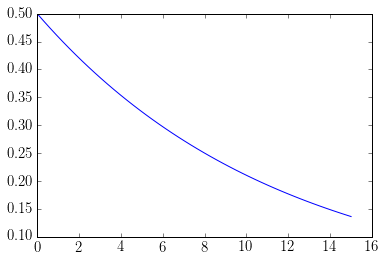

In [30]:
contrast_transference = 1.0 / (1.0 + sky_to_ground_ratio * (1.0/T -1))
apparent_contrast = zero_range_contrast * contrast_transference
plt.plot(R, apparent_contrast)

In [34]:
60.0 / (np.pi * 1.0 / 180.0 ) / 1000.0

3.437746770784939

In [50]:
16/7460.

0.0021447721179624667

In [51]:
3*2.144

6.432

In [53]:
1/(2*0.291)

1.718213058419244